# Data Preprocessing

## Cleaning the Data
Delete instances/attributes, replace, provide improvements or imputations

### Loading in Data

In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)


database = "C:\\Users\\vswen\\Documents\\10. JADS\\1. Introduction to Machine Learning\\1. Project\\European Cities AirBnb.csv"
dataframe = pd.read_csv(database)


### Data Understanding

In [48]:
#dataframe.head(20)
#dataframe.shape
#print(dataframe.dtypes)
#dataframe.isnull().sum()
#dataframe[dataframe.duplicated()==True]



dataframe.groupby('City')['City'].agg('count')
#dataframe.groupby('Room Type')['Room Type'].agg('count')

#print(dataframe['Price'].unique())
#print(dataframe['City Center (km)'].unique())
#print(dataframe['Metro Distance (km)'].unique())
#print(dataframe['Attraction Index'].unique())
#print(dataframe['Normalised Attraction Index'].unique())
#print(dataframe['Restraunt Index'].unique())
#print(dataframe['Normalised Restraunt Index'].unique())

City
Amsterdam    2080
Athens       5280
Barcelona    2833
Berlin       2484
Budapest     4022
Lisbon       5763
Paris        6688
Rome         9027
Vienna       3537
Name: City, dtype: int64

### Data Cleaning

In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#dataframe.columns =(
 #   dataframe.columns.str.replace('restraunt','restaurant')
  #  .str.replace('normalised', 'normalized'))


dataframe=dataframe.dropna()

## Floating
columns_to_clean = ['Price','City Center (km)', 'Metro Distance (km)', 'Attraction Index', 
                    'Normalised Attraction Index', 'Restraunt Index', 'Normalised Restraunt Index']

for column in columns_to_clean:
 dataframe[column] = dataframe[column].str.replace('.', '').astype(float)

scaler = StandardScaler()
numeric_columns = ['City Center (km)', 'Metro Distance (km)', 'Attraction Index', 
                   'Normalised Attraction Index', 'Restraunt Index', 'Normalised Restraunt Index']
dataframe[numeric_columns] = scaler.fit_transform(dataframe[numeric_columns])

### vanaf hier al feature engineering? de termen zijn voor mij nog niet helemaal zeker

## Binairy
dataframe['Day']=dataframe['Day'].replace({'Weekday':0, 'Weekend':1})
dataframe['Shared Room']=dataframe['Shared Room'].replace({False:0, True:1})
dataframe['Private Room']=dataframe['Private Room'].replace({False:0, True:1})
dataframe['Superhost']=dataframe['Superhost'].replace({False:0, True:1})

## Categorical
dataframe2 = pd.get_dummies(dataframe, columns=['City', 'Room Type'])

dataframe.head(20)




C:\Users\vswen\AppData\Local\Temp\ipykernel_22680\138711062.py:15: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataframe[column] = dataframe[column].str.replace('.', '').astype(float)


,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,1.940337e+16,0,Private room,0,1,2,0,1,0,10,93,1,-0.368314,0.210995,-0.224745,-0.568677,0.052917,-0.322476
1,Amsterdam,3.442458e+15,0,Private room,0,1,4,0,0,0,8,85,1,-0.829958,-0.317872,-0.372510,2.255107,-0.108833,-0.407196
2,Amsterdam,2.641014e+15,0,Private room,0,1,2,0,0,1,9,87,1,-0.301649,0.442638,-0.257144,2.876520,-0.934958,-0.339197
3,Amsterdam,4.335294e+15,0,Private room,0,1,4,0,0,1,9,90,2,-0.829958,-0.317872,3.709096,-0.718753,-0.066795,-0.385177
4,Amsterdam,4.855529e+15,0,Private room,0,1,2,1,0,0,10,98,1,-0.829958,-0.317872,-0.446850,1.854676,-0.133303,-0.420012
5,Amsterdam,5.528086e+14,0,Private room,0,1,3,0,0,0,8,100,2,-0.810369,0.078806,-0.805561,-0.077512,1.466525,-0.764183
6,Amsterdam,2.151243e+16,0,Private room,0,1,2,0,0,0,10,94,1,0.898893,-0.317872,-0.781480,0.052200,1.662105,-0.753940
7,Amsterdam,2.771307e+16,0,Entire home/apt,0,0,4,1,0,0,10,100,3,0.720332,2.719491,1.009902,0.096362,1.991136,0.692708
8,Amsterdam,1.001804e+16,0,Entire home/apt,0,0,4,0,0,0,9,96,2,-0.488144,2.173227,0.036536,-0.427938,0.449584,-0.114713
9,Amsterdam,2.765215e+16,0,Private room,0,1,2,0,1,0,10,88,1,-0.541154,-0.317872,-0.775706,0.083302,1.612282,0.494275


#### Visualy showing means per city (indicating data distribution per city)

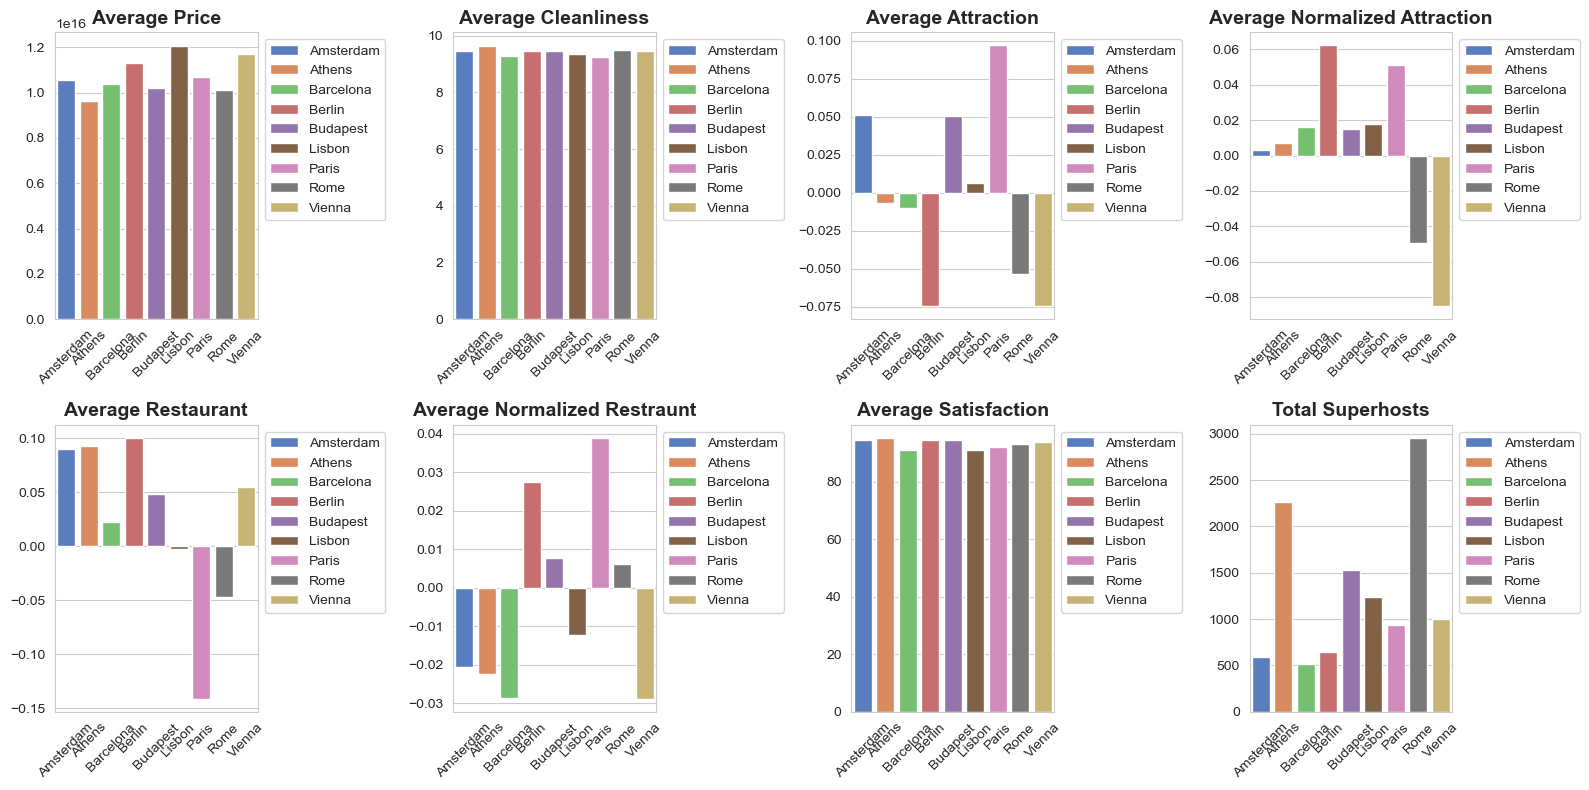

In [18]:
import seaborn as sns
sns.set_palette('muted')
sns.set_style('whitegrid')

airbnb_grouped = dataframe.groupby('City').agg(
    avg_price=('Price', 'mean'), 
    avg_cleanliness=('Cleanliness Rating', 'mean'),
    avg_satisfaction=('Guest Satisfaction', 'mean'),
    total_superhosts=('Superhost', 'sum'),
    avg_attraction=('Attraction Index', 'mean'),
    avg_normalized_attraction=('Normalised Attraction Index', 'mean'),
    avg_restaurant=('Restraunt Index', 'mean'),
    avg_normalized_restraunt=('Normalised Restraunt Index', 'mean')
    
    ).reset_index()

#cols_to_plot = airbnb_grouped.columns[1:]

plt.figure(figsize=(16,8))

for i, column in enumerate(cols_to_plot):
    plt.subplot(2,4,i+1)
    sns.barplot(x='City', y=column, data=airbnb_grouped, hue='City', dodge=False)
    plt.legend(loc='upper left', bbox_to_anchor=(1,1))
    col_title = column.replace('avg', 'Average').replace('_', ' ').title()
    plt.title(col_title, fontsize=14, weight='bold')
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()



### Feature Engineering

#### Handling outliers in price

<Axes: xlabel='Price', ylabel='Count'>

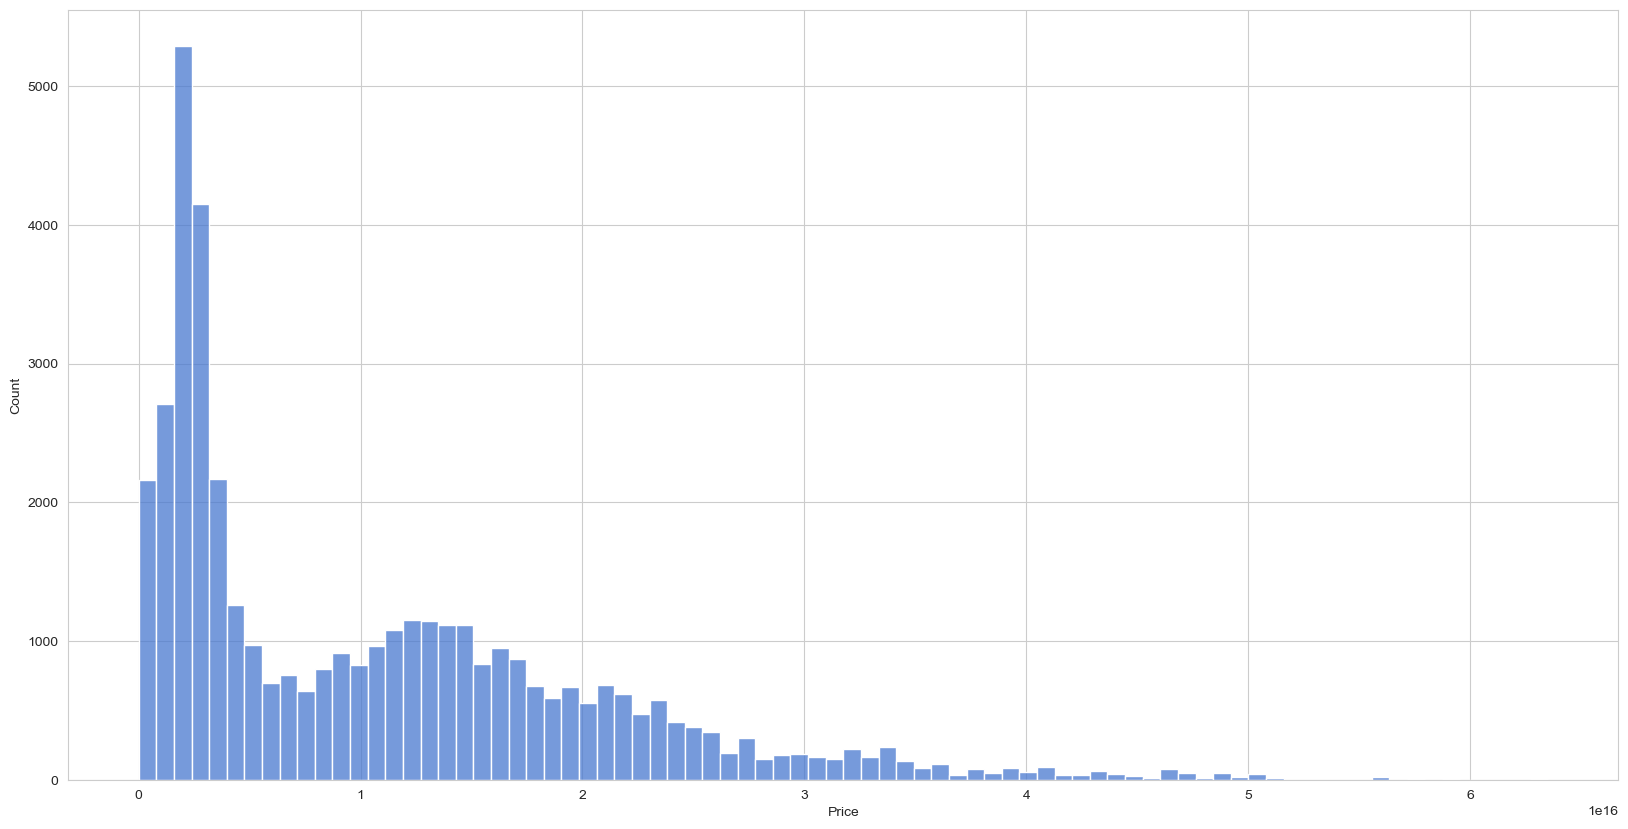

In [19]:
sns.histplot(dataframe['Price'])

first quartile is 2415572232645400 and third quartile is 16003195939277100
Inter Quartile Range is 13587623706631700
lower limit is -24746087556911368 and upper limit is 43164855728833872


<Axes: xlabel='Price', ylabel='Count'>

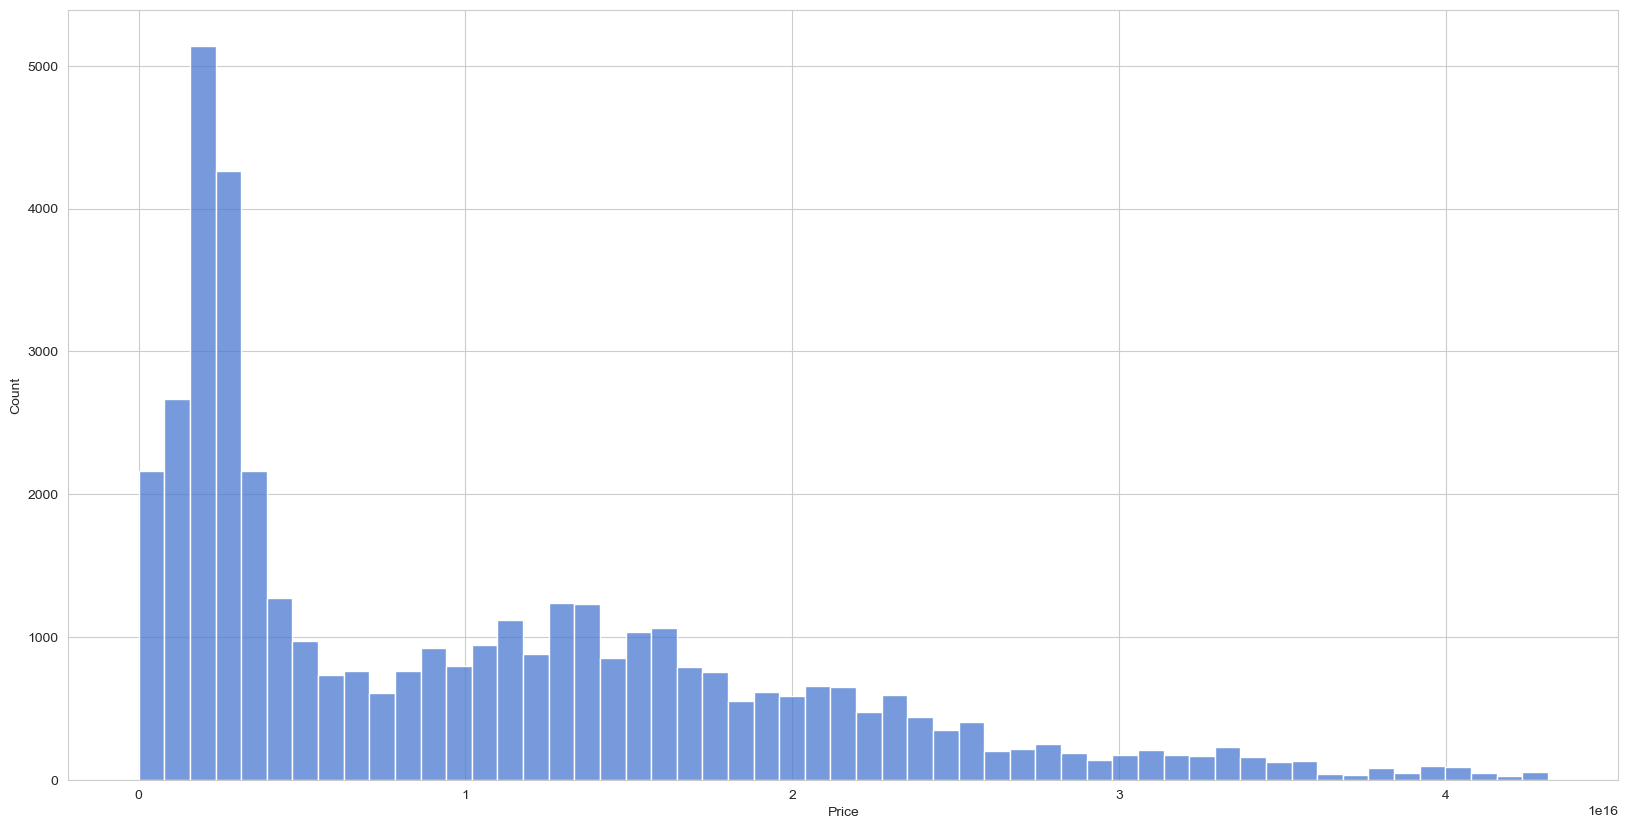

In [33]:
q1=dataframe['Price'].quantile(.25)
q3=dataframe['Price'].quantile(.75)
IQR=q3-q1

print('first quartile is %.f'%q1,'and third quartile is %.f'%q3)
print('Inter Quartile Range is %.f'%IQR)

limit_low=q1-IQR*1.999
limit_high=q3+IQR*1.999
print('lower limit is %.f'%limit_low, 'and upper limit is %.f'%limit_high)

dataframe=dataframe.query('Price < @limit_high')
sns.histplot(dataframe['Price'])

In [34]:
dataframe.describe()

,Price,Day,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,4.132200e+04,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000
mean,1.030854e+16,0.499298,0.007599,0.315764,3.234718,0.280214,0.295629,0.341416,9.443081,93.110885,1.164900,-0.000259,0.000111,0.000648,0.000031,-0.000017,0.000149
std,9.305083e+15,0.500006,0.086841,0.464825,1.298361,0.449109,0.456331,0.474190,0.888915,8.145524,0.637068,1.000222,1.000403,0.999896,1.000924,0.999887,0.999325
min,1.250000e+02,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,20.000000,0.000000,-0.829958,-0.317872,-0.971399,-0.970867,-1.041171,-0.895530
25%,2.413057e+15,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,9.000000,90.000000,1.000000,-0.703106,-0.317872,-0.691491,-0.679188,-0.679396,-0.661482
50%,7.747490e+15,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,10.000000,95.000000,1.000000,-0.458759,-0.317872,-0.366619,-0.279669,-0.261317,-0.445850
75%,1.598200e+16,1.000000,0.000000,1.000000,4.000000,1.000000,1.000000,1.000000,10.000000,98.000000,1.000000,0.505023,-0.317872,0.315906,0.338344,0.313929,0.378832
max,4.312461e+16,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,10.000000,100.000000,10.000000,6.408176,14.383237,5.097609,6.749363,6.075006,5.792714


## Visualization

### Boxplot Prices per City

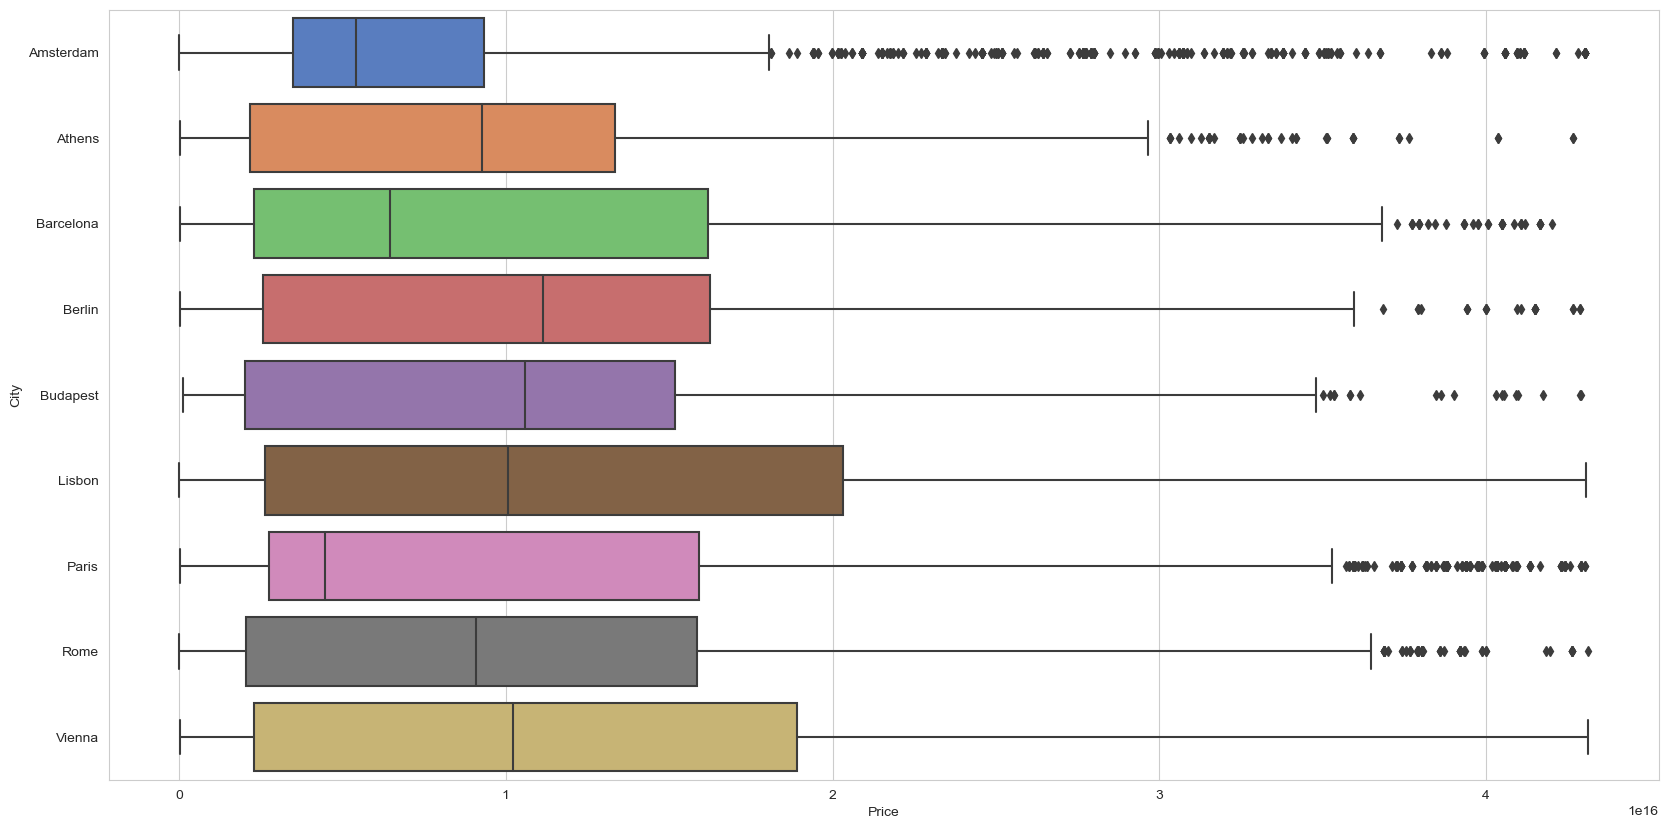

In [35]:
sns.boxplot(dataframe, y=dataframe['City'], x=dataframe['Price']);

## Boxplot Prices per Day

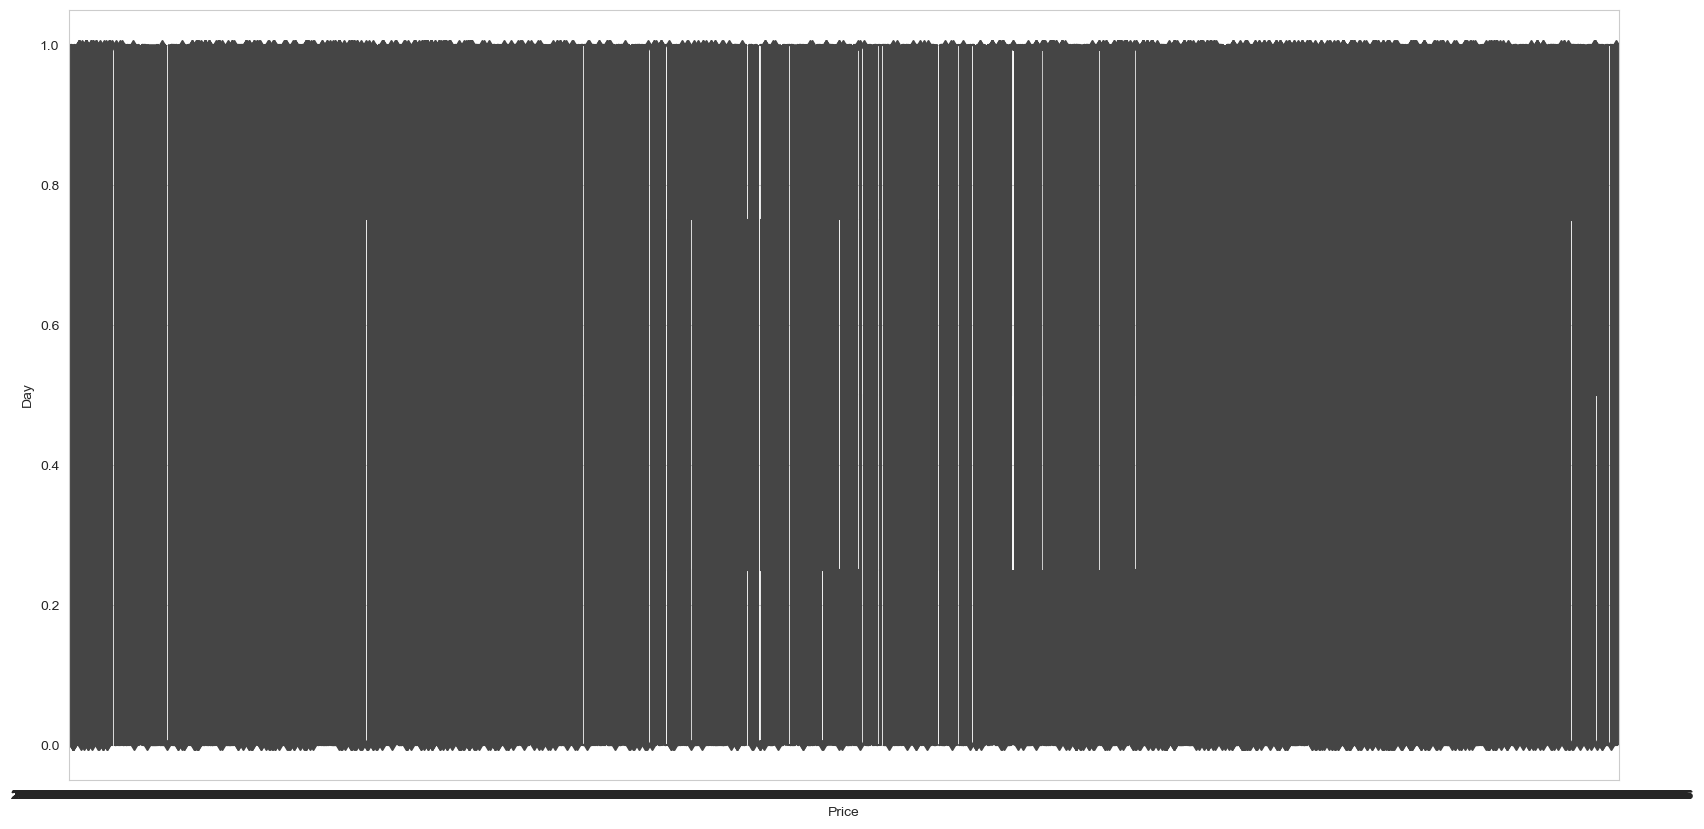

In [42]:
sns.boxplot(dataframe,y=dataframe['Day'], x=dataframe['Price']);

## Boxplot by Price and Room Type

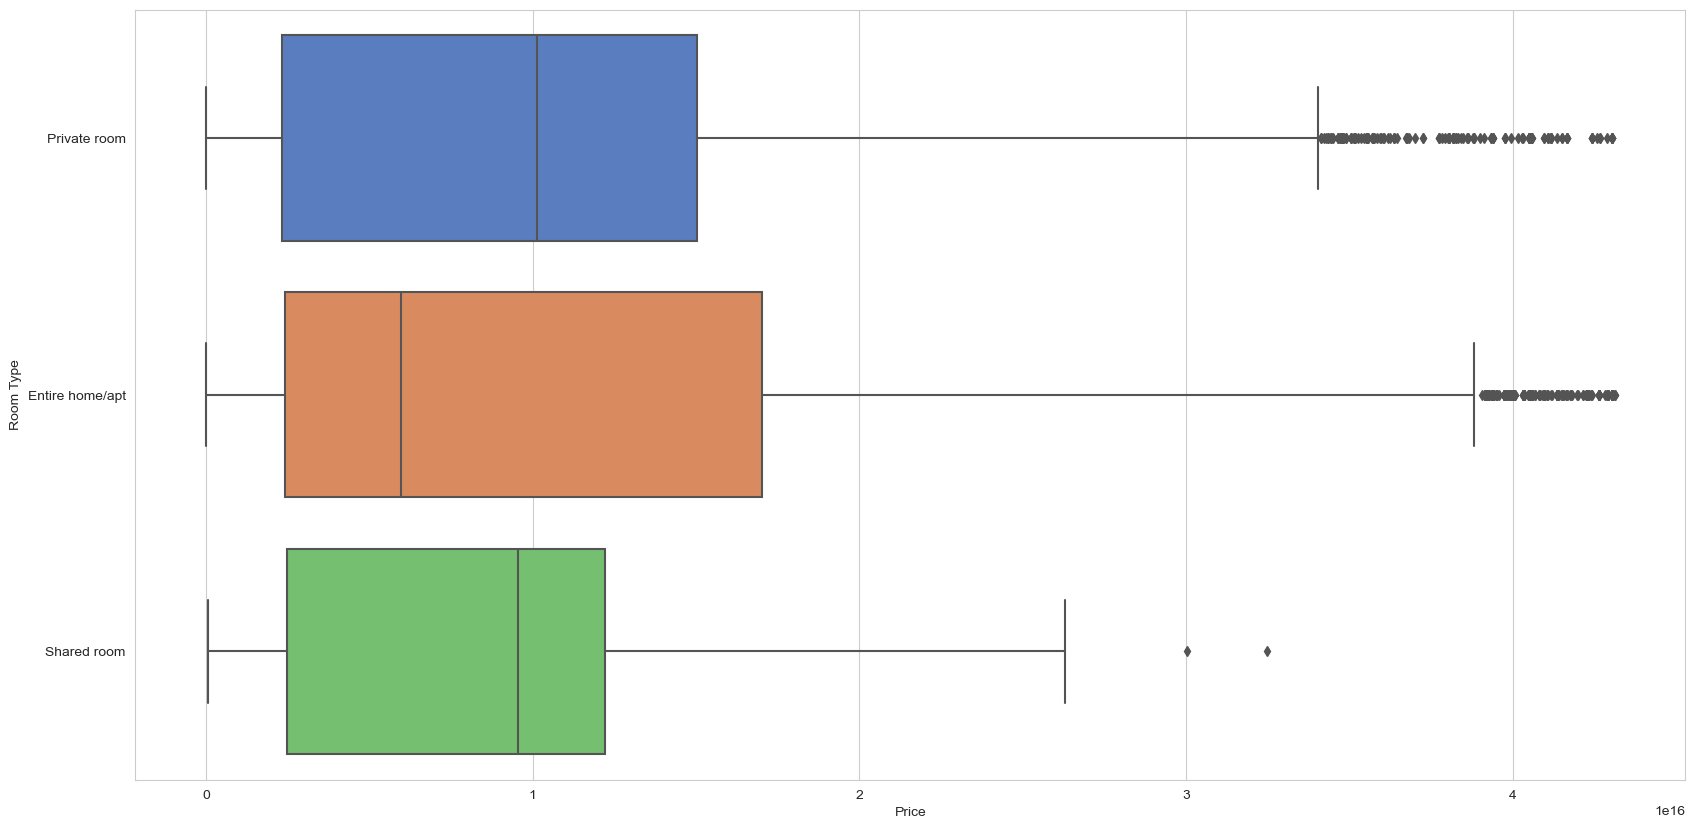

In [43]:
sns.boxplot(dataframe, y=dataframe['Room Type'], x=dataframe['Price']);

C:\Users\vswen\AppData\Local\Temp\ipykernel_22680\1450765197.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(), annot=True, fmt='1.1f');


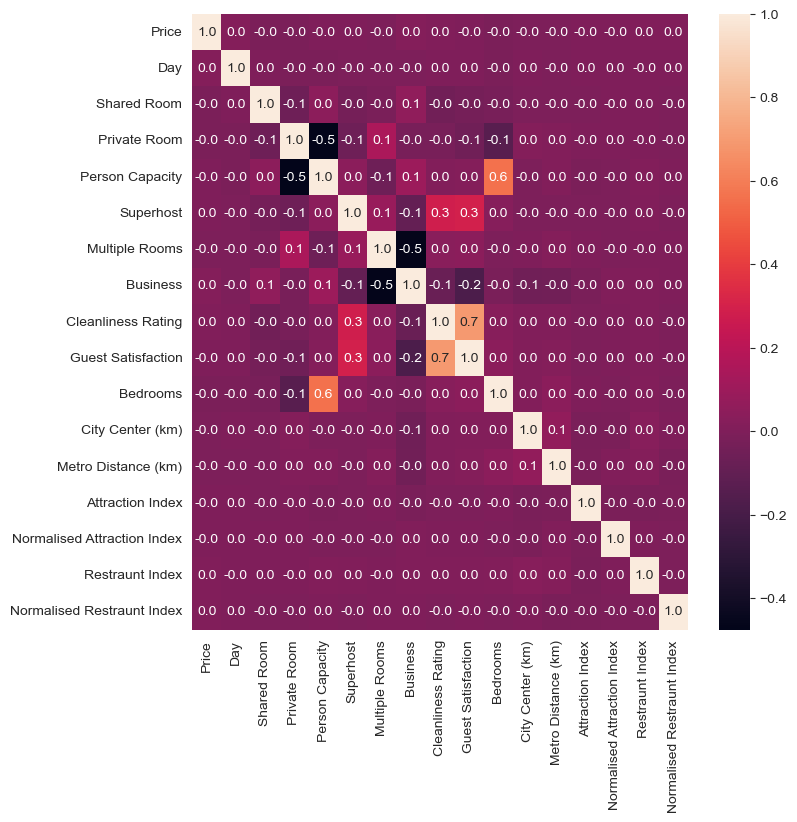

In [44]:
plt.figure(figsize=(8,8))
sns.heatmap(dataframe.corr(), annot=True, fmt='1.1f');